# Notebook exploration

Dans ce notebook nous nous intéresserons aux données du site stackoverflow. Plus particulièrement aux questions qui ont pu être posées sur ce site afin de faire un nettoyage, une analyse univariée et une analyse multivariée. 
L'objectif est de comprendre nos données en vue de réaliser un modèle supervisé ou non supervisé afin d'attribuer automatiquement un ou plusieurs tags à une nouvelle question.

**Rappel** : les données ont pu être extraites grâce à une requête SQL incluant divers filtres cités ci-dessous : 

- Question dont le nombre de vue est strictement supérieur à 20 
- Question dont le nombre de commentaires est strictement supérieur à 5 
- Question dont le nombre de réponses est strictement supérieur à 0 
- Question dont le score est strictement supérieur à 5 
- Question dont le nombre de tags associé est strictement supérieur à 0   

Nous pouvons ainsi directement déduire que le nettoyage de nos données sera simplifier puisque nos données sont déjà préfiltrées.

Commençons par réaliser les imports nécessaires au bon fonctionnement de notre analyse.

In [1]:
import pandas as pd
import re
import matplotlib as plt 
import seaborn as sns
import warnings
import numpy as np 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("../data/data_not_clean.csv")

data.head()

,Id,CreationDate,Title,Body,Tags,ViewCount,CommentCount,AnswerCount,Score
0,58492203,2019-10-21 18:29:53,Unable to continue with rebase due to untracke...,<p>I'm currently mergin two branches using <co...,<git>,8724,7,3,8
1,55993039,2019-05-05 14:32:37,Progressive Web App on iOS 12.2 stuck in offli...,<p>I installed a custom progressive web app vi...,<ios><progressive-web-apps>,1408,8,1,10
2,55850013,2019-04-25 13:06:47,__PRETTY_FUNCTION__ in constant expression,<p>Please refer to this snippet:</p>\n\n<pre><...,<c++><c++17><constant-expression>,1793,7,2,14
3,55850042,2019-04-25 13:08:12,How to fix 'http: named cookie not present' in...,<p>I'm building a small dinner/plan management...,<http><go><cookies><jwt><postman>,14128,16,2,7
4,55850656,2019-04-25 13:39:24,How can I read a file which will be upload fro...,<p>I create a method in my .Net Core API which...,<c#><file><upload><asp.net-core-webapi>,13149,6,2,17


Nous pouvons directement établir une liste des diffèrentes variables accessible.

- ID (Id de la question)
- CreationDate (Date de création de la question)
- Title (Titre de la question)
- Body (Contenu de la question)
- Tags (Tags attribué à la question)
- ViewCount (Nombre de vues)
- CommentCount (Nombre de commentaire)
- AnswerCount (Nombre de réponse)
- Score (Score de la question) 

Intéressons-nous à la variable CreationDate et plus particulièrement à son type :

In [3]:
data.dtypes 

Id               int64
CreationDate    object
Title           object
Body            object
Tags            object
ViewCount        int64
CommentCount     int64
AnswerCount      int64
Score            int64
dtype: object

Nous pouvons ainsi établir trois problématiques apparentes :

- CreationDate est dans un type "Objet" et non DateTime
- Body comporte des balises HTML inutiles pour notre analyse
- Tags comportent des chevrons entourant chaque tag 

Nous allons pouvoir travailler sur ses problématiques.

In [4]:
data['CreationDate'] = pd.to_datetime(data['CreationDate']) 

def clean_html(raw_html):
  cleantext = re.sub(re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});') , '', raw_html)
  return cleantext

def clean_tags(tag): 
  tag = tag.replace("<", "").replace(">", " ") 
  return tag

data['Body'] = data['Body'].apply(clean_html)  
data['Tags'] = data['Tags'].apply(clean_tags)  

data.head() 

,Id,CreationDate,Title,Body,Tags,ViewCount,CommentCount,AnswerCount,Score
0,58492203,2019-10-21 18:29:53,Unable to continue with rebase due to untracke...,I'm currently mergin two branches using git re...,git,8724,7,3,8
1,55993039,2019-05-05 14:32:37,Progressive Web App on iOS 12.2 stuck in offli...,I installed a custom progressive web app via s...,ios progressive-web-apps,1408,8,1,10
2,55850013,2019-04-25 13:06:47,__PRETTY_FUNCTION__ in constant expression,Please refer to this snippet:\n\n#include type...,c++ c++17 constant-expression,1793,7,2,14
3,55850042,2019-04-25 13:08:12,How to fix 'http: named cookie not present' in...,I'm building a small dinner/plan management ap...,http go cookies jwt postman,14128,16,2,7
4,55850656,2019-04-25 13:39:24,How can I read a file which will be upload fro...,I create a method in my .Net Core API which wi...,c# file upload asp.net-core-webapi,13149,6,2,17


In [5]:
data.dtypes 

Id                       int64
CreationDate    datetime64[ns]
Title                   object
Body                    object
Tags                    object
ViewCount                int64
CommentCount             int64
AnswerCount              int64
Score                    int64
dtype: object

Nous pouvons désormais voir que nos problématiques ont bien été solutionner.

- L'individu CreationDate est dans un type datetime
- L'individu Body ne comporte plus de balise HTML
- L'individu Tags ne comporte plus de chevrons 

Intéressons-nous maintenant à notre variable Tags

# Analyses

L'individu Tags comporte l'ensemble des tags attribué à une question.

Essayons de faire une calculer le nombre de tags associé à chaque questions et d'observer la répartition.

,tags_count,number_of_questions
count,5.000000,5.000000
mean,4.000000,2666.800000
std,1.581139,1059.930281
min,2.000000,881.000000
25%,3.000000,2542.000000
50%,4.000000,3127.000000
75%,5.000000,3279.000000
max,6.000000,3505.000000


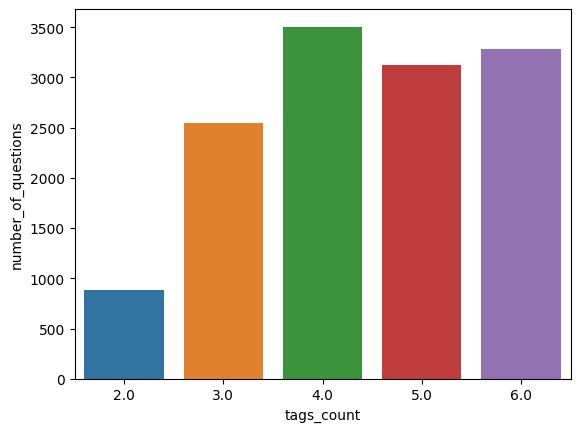

In [6]:
def count_tags(tag): 
  return len(tag.split(" ")) 

data['Tags_count'] = data['Tags'].apply(count_tags) 

tags_df = pd.DataFrame({ "tags_count": [], "number_of_questions": [] }) 

for tag_count in data['Tags_count'].unique(): 
  tags_df = tags_df.append({ "tags_count": tag_count, "number_of_questions": len(data[data['Tags_count'] == tag_count]) }, ignore_index=True)

sns.barplot(data=tags_df, x="tags_count", y="number_of_questions")

tags_df.describe()

Nous observons que le plus grand nombre de questions possède 4 tags et qu'en moyenne une question peut posséder entre 3 et 6 tags.
Les questions qui n'ont que 2 tags sont largement moins nombreuse.

Nous pourrions maintenant avoir envie de connaître la répartition du score sur l'ensemble de la population.

### Score

Using matplotlib backend: <object object at 0x0000022B29698D70>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


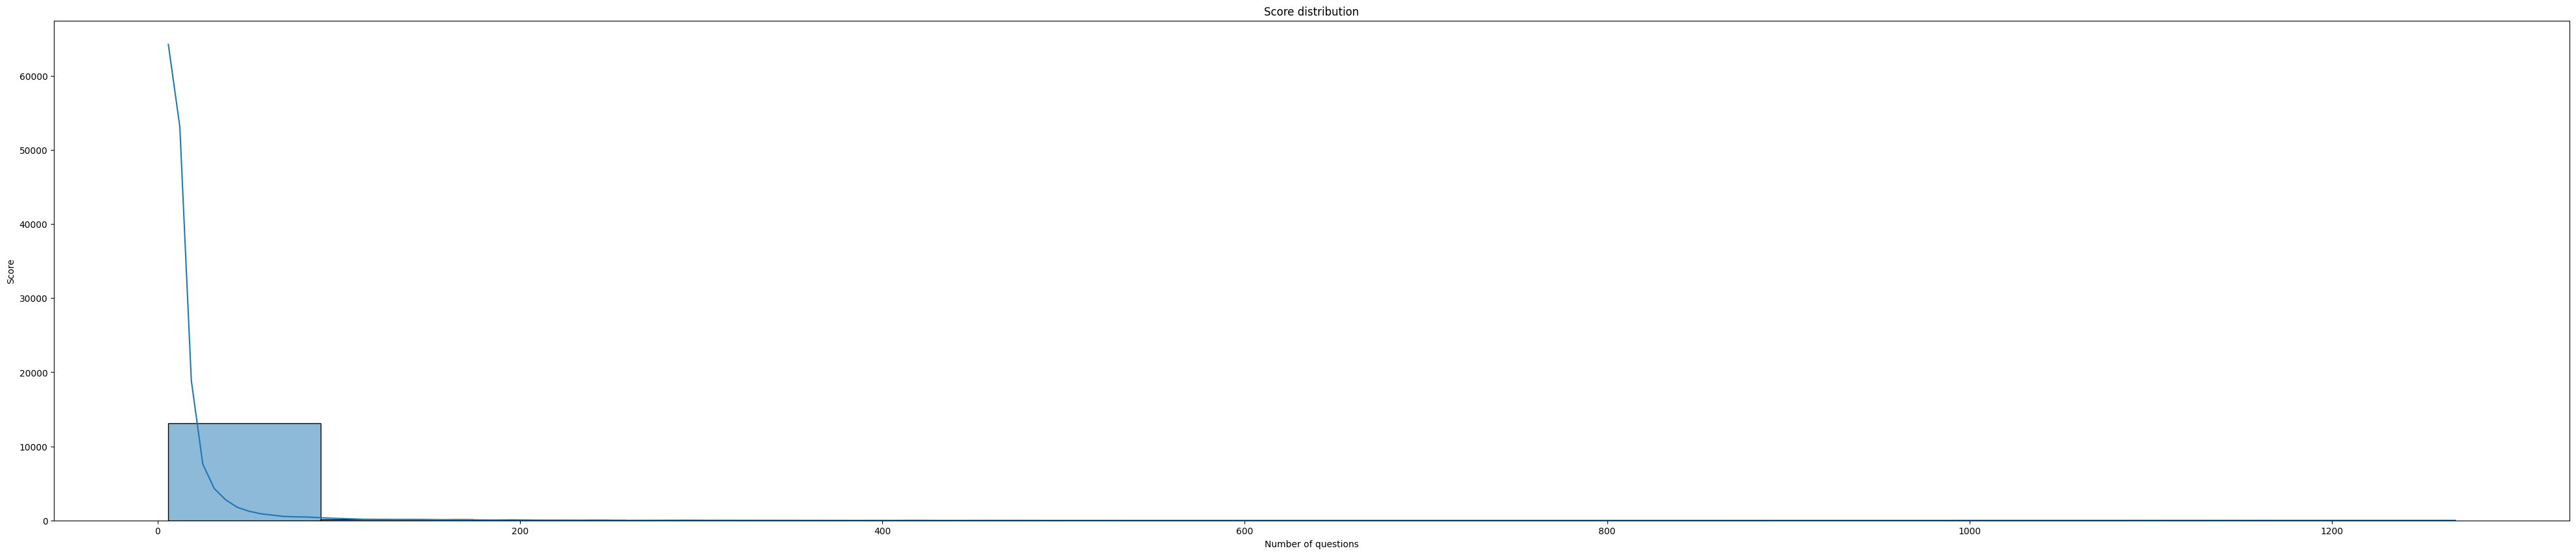

Indicateurs de la distribution de la variable Score : count    13334.000000
mean        15.401755
std         29.920596
min          6.000000
25%          7.000000
50%          9.000000
75%         14.000000
max       1268.000000
Name: Score, dtype: float64


In [7]:
%pylab 
%matplotlib inline 
def distribution(col):
    fig, ax = plt.subplots(nrows=1, figsize=(50, 10))
    sns.histplot(data=data, x=col, bins="sturges", kde=True) 
    ax.set_ylabel(f"{col}") 
    ax.set_xlabel("Number of questions") 
    ax.set_title(f"{col} distribution") 
    plt.show() 
    print(f"Indicateurs de la distribution de la variable {col} : {data[col].describe()}")

distribution("Score")

Nous pouvons constater une distribution centrée autour de la valeur 9.

Il serait intéressant de comprendre la répartition des questions par rapport à la date.

### CreationDate

Using matplotlib backend: TkAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


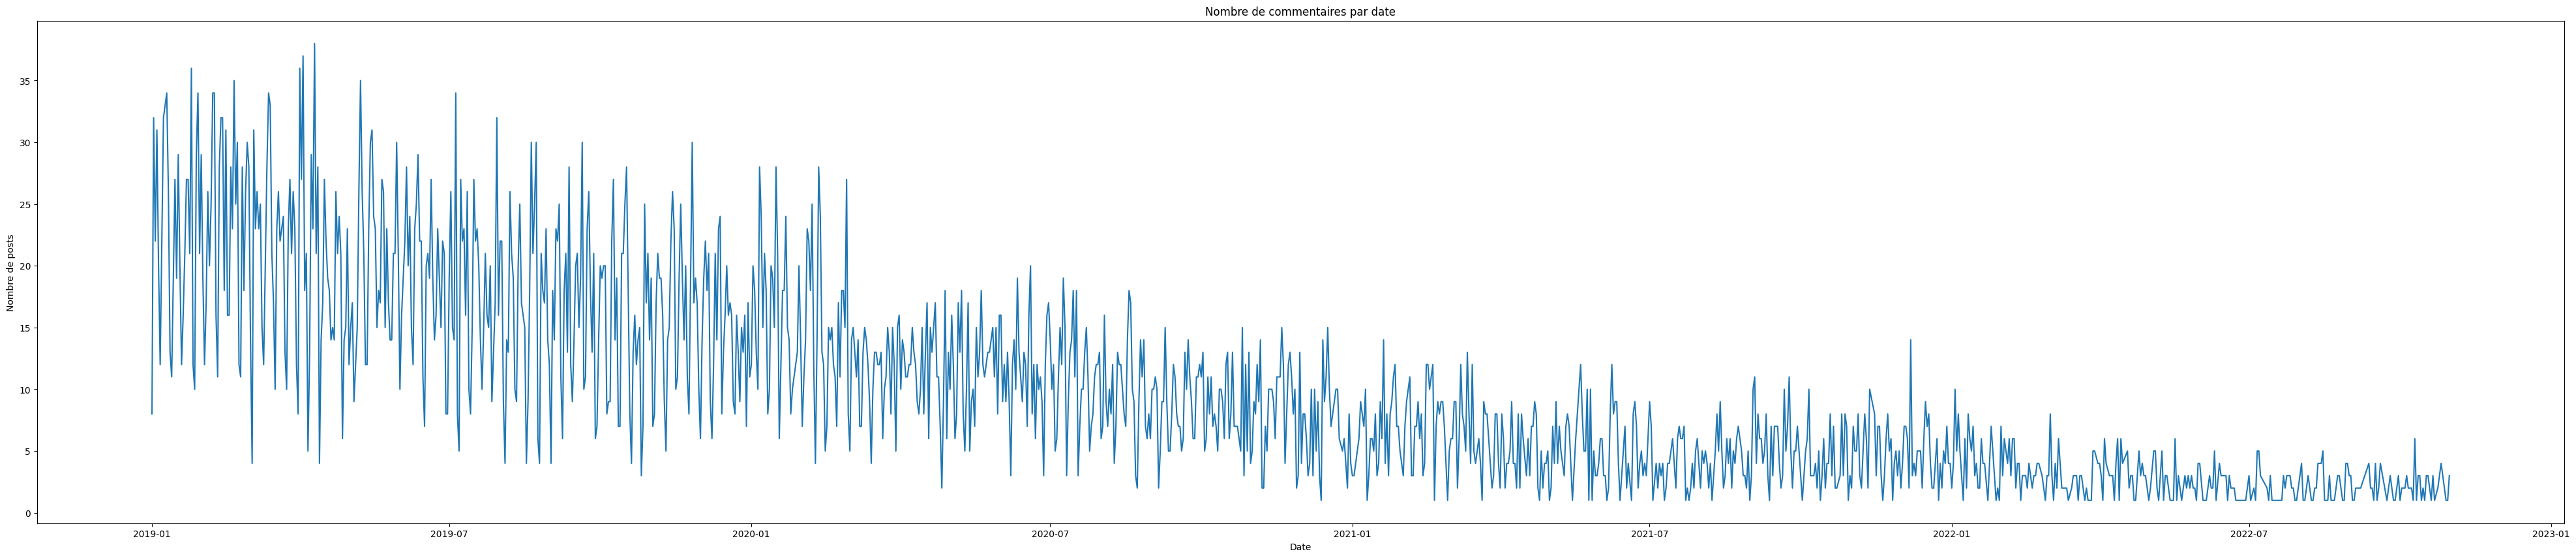

In [8]:
%pylab 
%matplotlib inline
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(50,10))
creation_date_by_day = data['CreationDate'].dt.date.value_counts()

sns.lineplot(data=creation_date_by_day, x=creation_date_by_day.index, y=creation_date_by_day.values, ax=ax)
ax.set_xlabel("Date")
ax.set_ylabel("Nombre de posts")
ax.set_title("Nombre de commentaires par date")

plt.show()

Nous pouvons observer une baisse d'activité sur le temps. Nous pourrions déduire qu'avec le temps, les utilisateurs postent moins de questions puisqu'il peuvent trouver la réponse à leur question en la recherchant dans les questions déjà posté. 

Nous pourrions maintenant poursuivre avec d'autres variables dont nous aimerions connaître la distribution notamment : 

- ViewCount
- AnswerCount
- CommentCount 

### ViewCount

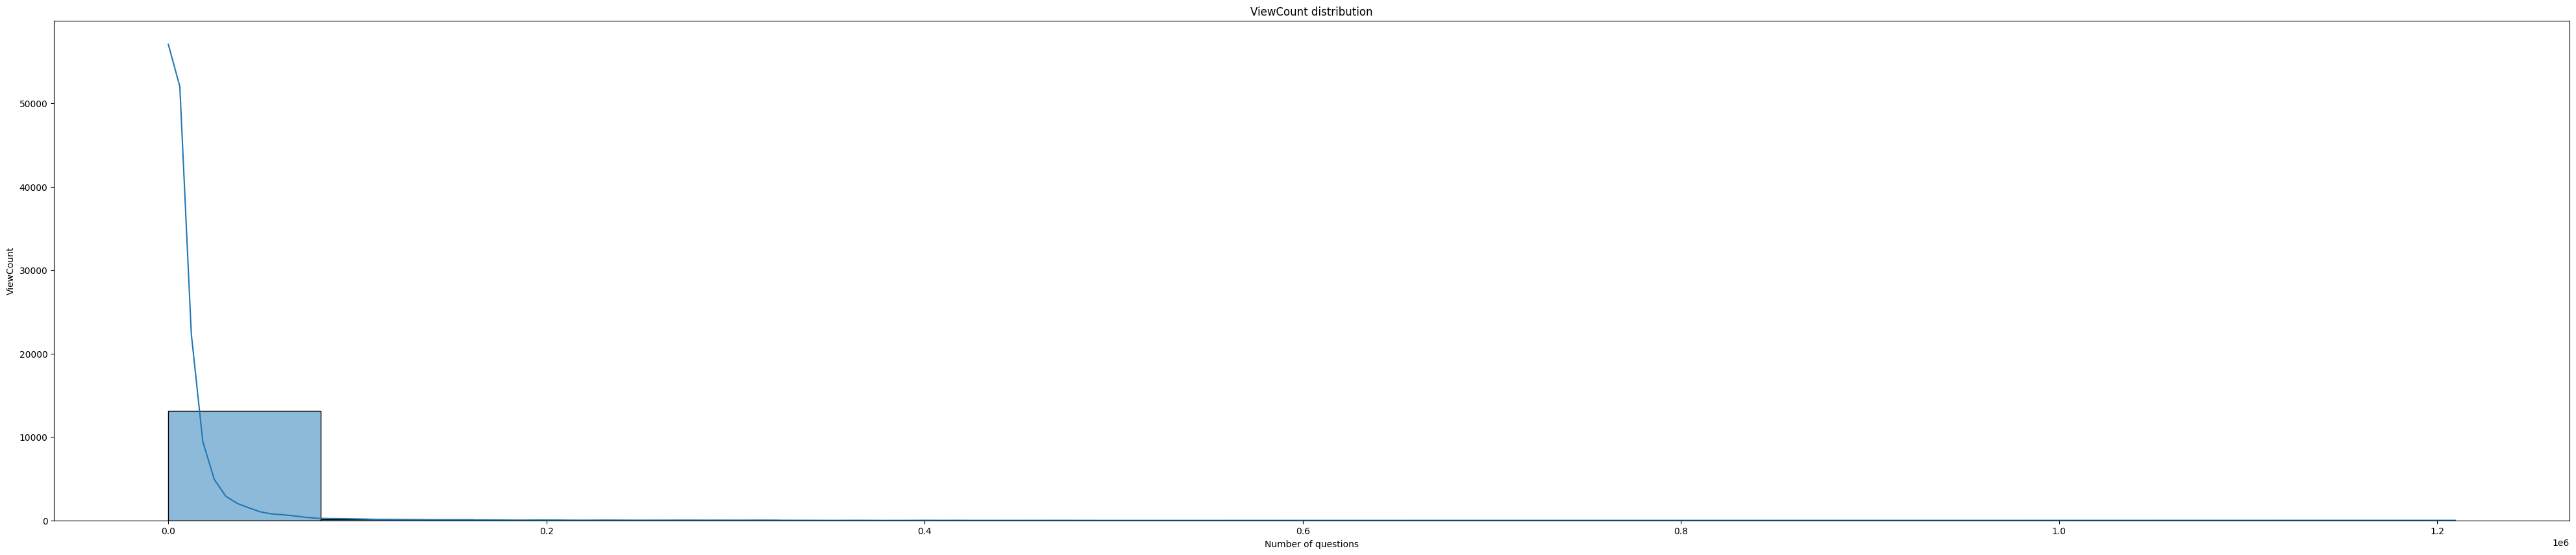

Indicateurs de la distribution de la variable ViewCount : count    1.333400e+04
mean     9.642765e+03
std      3.203517e+04
min      5.600000e+01
25%      8.550000e+02
50%      2.785000e+03
75%      8.530750e+03
max      1.209498e+06
Name: ViewCount, dtype: float64


In [9]:
distribution("ViewCount")

La répartition est centrée autour de 2.7 pour le nombre de vue

### AnswerCount

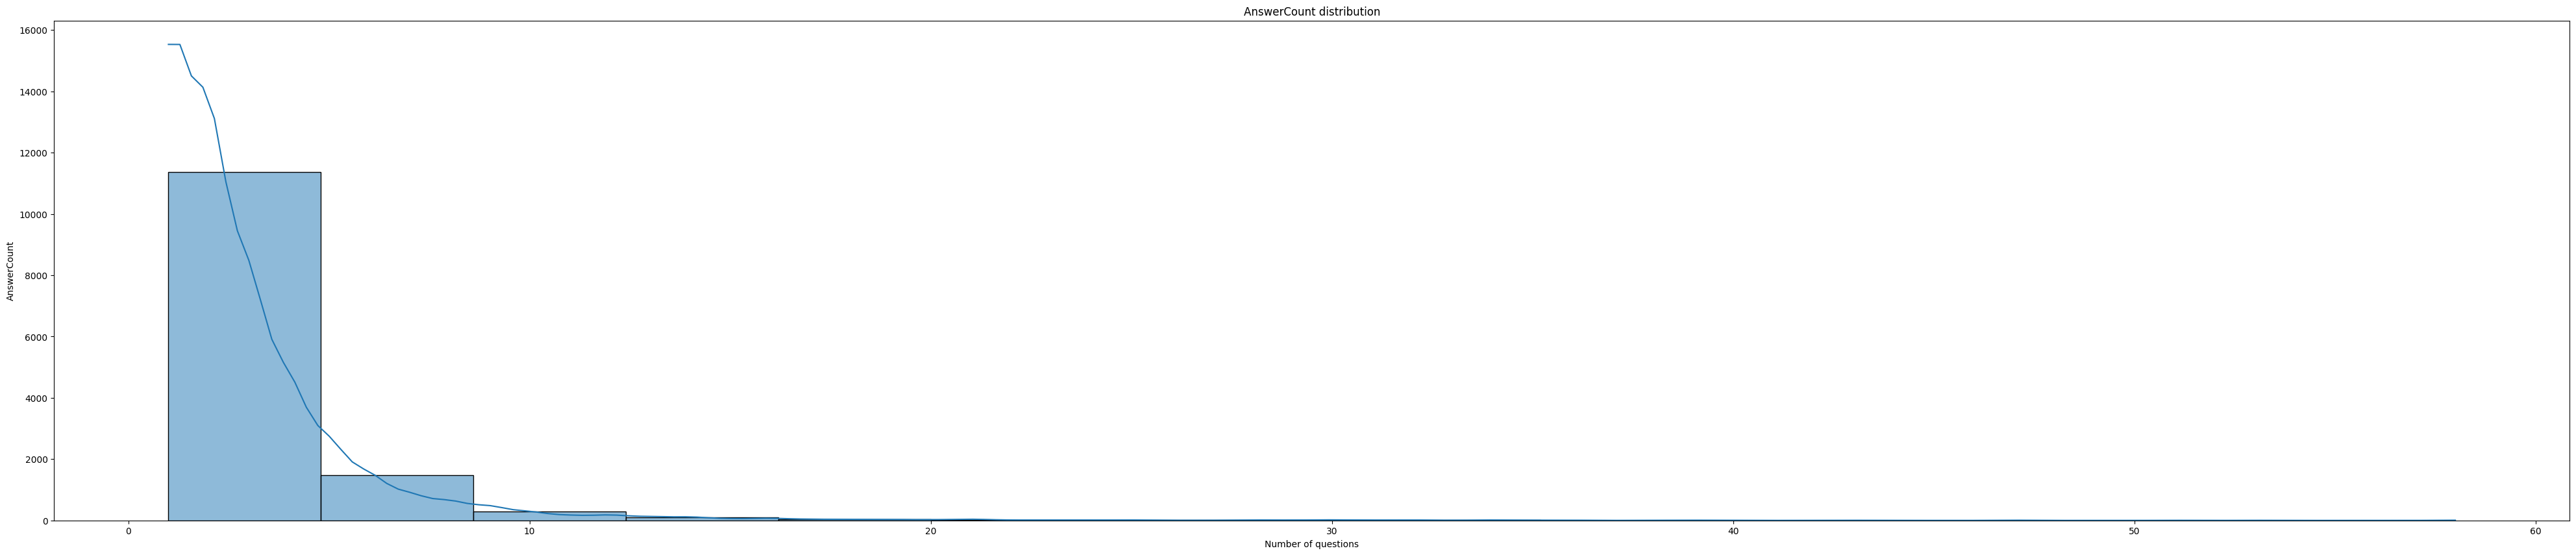

Indicateurs de la distribution de la variable AnswerCount : count    13334.000000
mean         2.898455
std          3.121391
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         58.000000
Name: AnswerCount, dtype: float64


In [10]:
distribution('AnswerCount') 

La répartition est centrée autour de 2 pour le nombre de réponse

### CommentCount

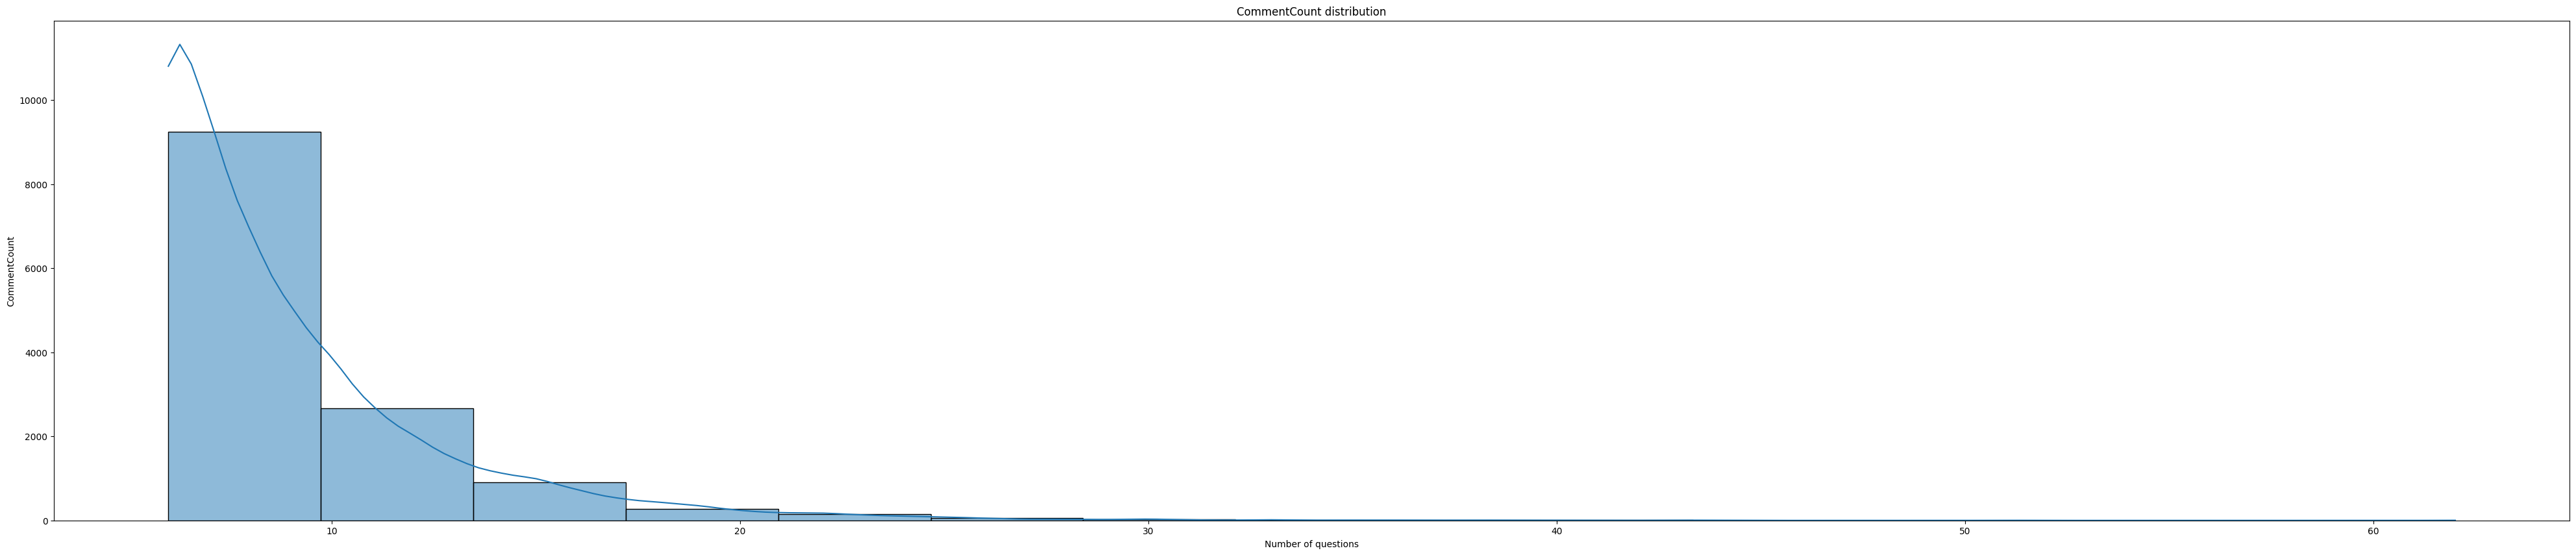

Indicateurs de la distribution de la variable CommentCount : count    13334.000000
mean         9.018224
std          3.790535
min          6.000000
25%          6.000000
50%          8.000000
75%         10.000000
max         62.000000
Name: CommentCount, dtype: float64


In [11]:
distribution('CommentCount')

La répartition est centrée autour de 8 pour le nombre de commentaire

Nous pourrions désormais afficher la corrélation entre les diffèrentes variables numérique pour émettre nos hypothèses :

Text(0.5, 1.0, 'Correlation matrix')

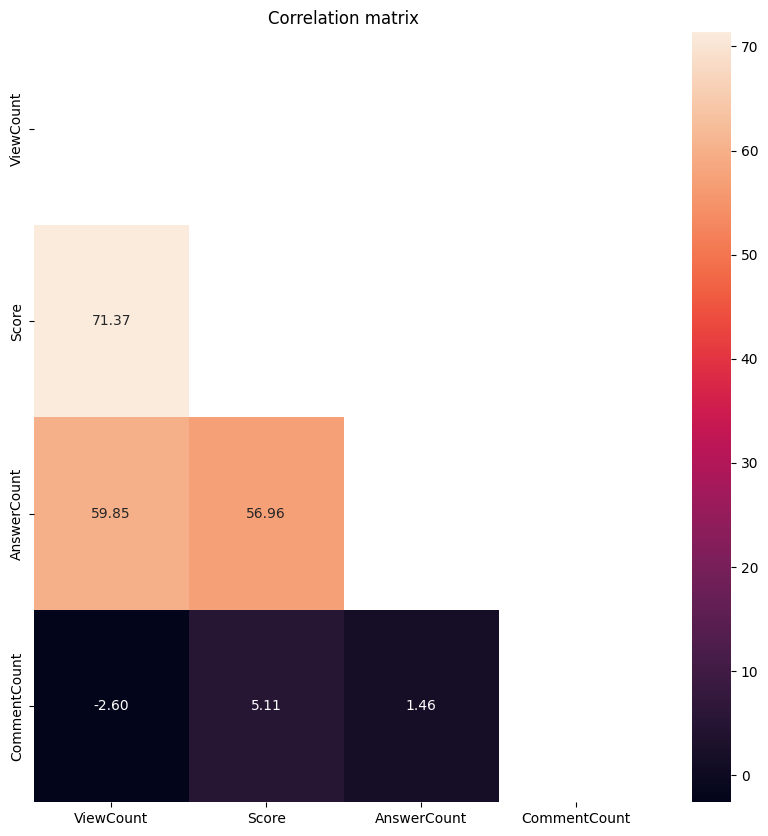

In [12]:
cor = data[["CreationDate", "ViewCount", "Score", "AnswerCount", "CommentCount"]].select_dtypes(include=['int64', 'float64']).corr(method="pearson") * 100
cl  = np.zeros_like(cor)
upper_triangle = np.triu_indices_from(cor) 
cl[upper_triangle] = 1

fig, ax = plt.subplots(figsize=(10, 10)) 

sns.heatmap(cor , annot=True, mask=cl, fmt="2.2f")
ax.set_title(f"Correlation matrix")  

Le graphique permet effectivement d'affirmer des hypothèses tout à fait logique.



In [13]:
data.to_csv('../data/data_clean.csv')